In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
%matplotlib inline

## Экспоненциальное распределение

In [2]:
from scipy.stats import expon

Экспоненциальное распределение — непрерывное распределение, использующееся для описания интервалов времени между двумя последовательными случайными событиями при условии их независимости. При этом количество событий за единицу времени описывается распределением Пуассона.

Основные характеристики экспоненциального распределения:
* Плотность: $$p(x) = \begin{cases}
   0 & x \le 0\\
   \lambda\exp^{-\lambda x} & x > 0 
 \end{cases}$$
* Функция распределения: $$F(x) = \begin{cases}
   0 & x \le 0\\
   1 - \exp^{-\lambda x} & x > 0 
 \end{cases}$$

* Матожидание: $1/\lambda$
* Дисперсия: $1/\lambda^2$

Ниже приведены графики плотности экспоненциального распределения при различных условиях на $\lambda$.

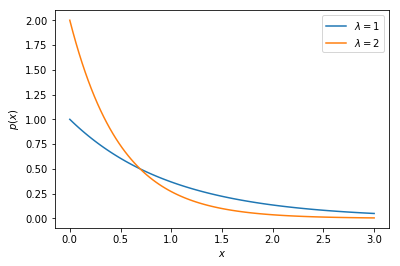

In [3]:
x = np.linspace(0,3,100)
plt.plot(x, [expon.pdf(i) for i in x], label = "$\lambda = 1$")
plt.plot(x, [expon.pdf(i, scale = 1./2) for i in x], label = "$\lambda = 2$")
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()

В дальнейшем будет исследоваться экспоненциальная функция с параметром $\lambda = 1$. Тогда $EX = 1$, $DX = 1$

Согласно ЦПТ, выборочное среднее $\overline{X_n} \approx \sim N(EX, \frac{DX}{n})$. Так как $EX = 1$, $DX = 1$, то $\overline{X_n} \approx \sim N(1, \frac{1}{n})$, где $n$ есть размер выборки и принимет одно из значений [5,25,100].

Построим графики распределения выборочного среднего и плотность соответствующего приближающего согласно ЦПТ нормального распределения для каждого из значений $n$.

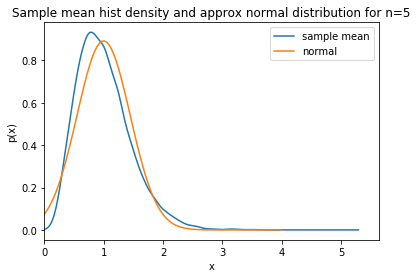

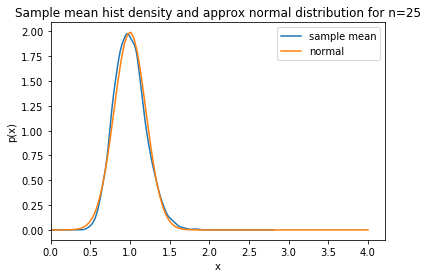

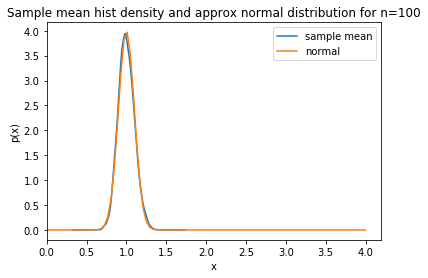

In [6]:
sample_number = 10**4 

for sample_size in [5,25,100]:
    data = [np.mean(expon.rvs(size=sample_size)) for _ in xrange(sample_number)] # сгенерировать sample_number средних значений
    # выборок размера sample_size
    df = pd.DataFrame(data)
    df.plot(label="hist", kind='density') # будем строить плотность гистограммы распределения для полученных средних значений
    x = np.linspace(0,4,100)
    y = norm(loc=1,scale=(1.0/sample_size)**0.5).pdf(x) # Построение соответствующего аппроксимирующего нормального распределения
    plt.plot(x, y, label="normal")
    plt.xlim(xmin = 0)
    plt.title("Sample mean hist density and approx normal distribution for n={}".format(sample_size,))
    plt.xlabel("x")
    plt.ylabel("p(x)")
    plt.legend().get_texts()[0].set_text('sample mean')
    plt.show()

Легко видеть, что точность аппроксимации ожидаемо увеличивается с ростом $n$. Также, в силу скошенности исходного экспоненциального распределения хорошо видно, что пик распределения выборочного среднего находится левее пика при нормальном распределении при малых n.